# External Neighbours

In [1]:
# Astropy tools
import astropy.units as u
from astropy.coordinates import Angle, SkyCoord

# Moc and HEALPix tools
import cdshealpix
import mocpy
from mocpy import MOC, WCS

# For plots
import matplotlib.pyplot as plt

import numpy as np

print("healpix version : ", cdshealpix.__version__)
print("mocpy version : ", mocpy.__version__)

healpix version :  0.6.4
mocpy version :  0.13.0


In [2]:
ipix = np.arange(12 * 4**3, dtype=np.uint64)
depth = 3
delta_depth = 2

In [3]:
help(cdshealpix.external_neighbours)
edges, corners = cdshealpix.external_neighbours(ipix, depth, delta_depth)

Help on function external_neighbours in module cdshealpix.nested.healpix:

external_neighbours(ipix, depth, delta_depth, num_threads=0)
    Get the neighbours of specific healpix cells.
    
    This method returns two arrays. One containing the healpix cells
    located on the external borders of the cells (at depth: `depth` + `delta_depth`).
    The other containing the healpix cells located on the external corners of the cells
    (at depth: `depth` + `delta_depth`). Please note that some pixels do not have 4 external corners
    e.g. the 12 base pixels have each only 2 external corners.
    
    Parameters
    ----------
    ipix : `numpy.ndarray`
        The healpix cells from which the external neighbours will be computed
    depth : int
        The depth of the input healpix cells
    delta_depth : int
        The depth of the returned external neighbours will be equal to: `depth` + `delta_depth`
    num_threads : int, optional
        Specifies the number of threads to use for 

In [4]:
ipix_corner_cells = corners[corners >= 0].ravel().astype(int)
ipix_border_cells = edges.ravel().astype(int)

In [5]:
help(MOC.from_healpix_cells)

Help on method from_healpix_cells in module mocpy.moc.moc:

from_healpix_cells(ipix, depth, max_depth) method of builtins.type instance
    Create a MOC from a set of HEALPix cells at various depths.
    
    Parameters
    ----------
    ipix : `numpy.ndarray`
        HEALPix cell indices in the NESTED notation. dtype must be np.uint64
    depth : `numpy.ndarray`
        Depth of the HEALPix cells. Must be of the same size of `ipix`.
        dtype must be np.uint8. Corresponds to the `level` of an HEALPix cell in astropy.healpix.
    max_depth : int, The resolution of the MOC (degrades on the fly input cells if necessary)
    
    Raises
    ------
    IndexError
        When `ipix` and `depth` do not have the same shape
    
    Returns
    -------
    moc : `~mocpy.moc.MOC`
        The MOC



In [6]:
# Create the moc from corner cells
depth_corner_cells = np.ones(ipix_corner_cells.shape, dtype=np.uint8) * (
    depth + delta_depth
)
moc_from_corner_cells = MOC.from_healpix_cells(
    ipix=ipix_corner_cells, depth=depth_corner_cells, max_depth=depth + delta_depth
)

In [7]:
# Create the moc from border cells
depth_border_cells = np.ones(ipix_border_cells.shape, dtype=np.uint8) * (
    depth + delta_depth
)
moc_from_border_cells = MOC.from_healpix_cells(
    ipix=ipix_border_cells, depth=depth_border_cells, max_depth=depth + delta_depth
)

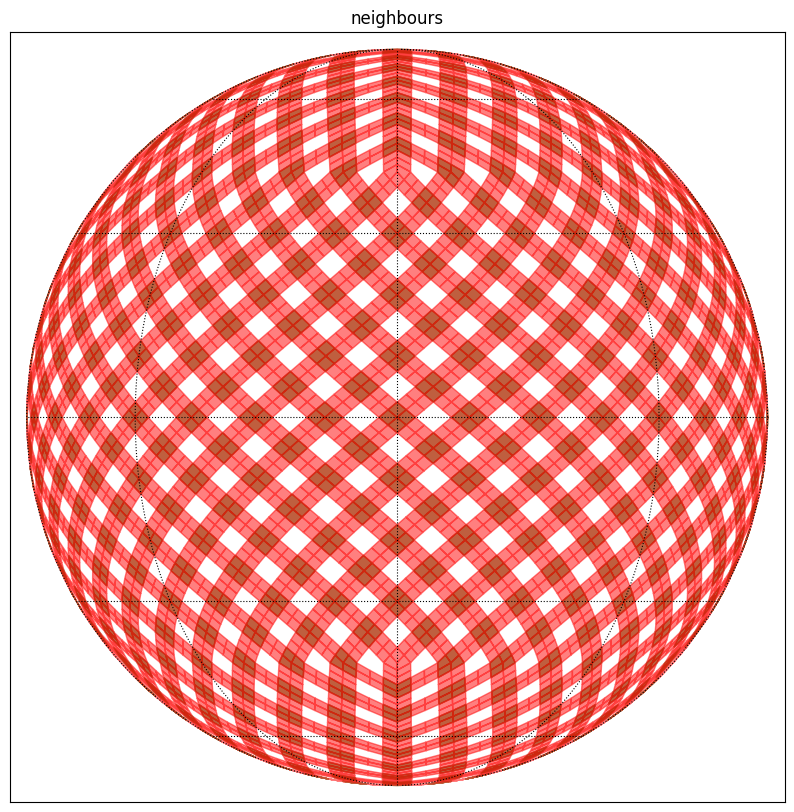

In [8]:
# Plot the MOC using matplotlib
fig = plt.figure(111, figsize=(10, 10))
# Define a astropy WCS from the mocpy.WCS class
with WCS(
    fig,
    fov=120 * u.deg,
    center=SkyCoord(0, 0, unit="deg", frame="icrs"),
    coordsys="icrs",
    rotation=Angle(0, u.degree),
    projection="SIN",
) as wcs:
    ax = fig.add_subplot(1, 1, 1, projection=wcs)

    moc_from_corner_cells.fill(ax=ax, wcs=wcs, alpha=0.5, fill=True, color="green")
    moc_from_border_cells.fill(ax=ax, wcs=wcs, alpha=0.5, fill=True, color="red")

plt.xlabel("ra")
plt.ylabel("dec")
plt.title("neighbours")
plt.grid(color="black", linestyle="dotted")
plt.show()